# Interactuar con el sistema

## Acceder al sistema

In [2]:
import requests
import lxml.html as lh

In [1]:
# Bibliotecas para usar Selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains

# Bibliotecas para manipulación de datos
import pandas as pd

# Biblioteca de empresiones regulares
import re

In [2]:
# modo interactivo permite abrir la ventana del navegador
# si está en True. Si no, entonces lo hará sin abrirlo
modoInteractivo = True

if modoInteractivo == True:
    driver = webdriver.Edge()
    driver.maximize_window()
else:
    op = webdriver.EdgeOptions()
    op.add_argument('headless')
    driver = webdriver.Edge(options = op)

In [4]:
# Modo local permite conectarse a la página oficial del sigmaa
# o bien, usar el archivo de modelo local
modoLocal = False

if modoLocal == True:
    url = 'file:///C:/Users/kenne/Music/En%20Mantenimiento.html'
    
else:
    url = 'https://uclb.ucaribe.edu.mx/sigmaav2/'

# Para acceder a la URL
driver.get(url)

In [5]:
driver.title

'Ingresar · SIGMAA - Unicaribe'

## Iniciar sesión

In [6]:
# Configurar las credenciales de acceso al sigmaa
username = '170300075'
password = 'Maripau01'

In [7]:
# Buscar el campo de usuario y escribir el username
userinput = driver.find_element(By.XPATH, '/html/body/div[2]/form/div/span[2]/input')
userinput.send_keys(username)

In [8]:
# Buscar el campo de contraseña y escribir el password
passinput = driver.find_element(By.XPATH, '/html/body/div[2]/form/div/input')
passinput.send_keys(password)

In [9]:
# Buscar el botón de submit y dar clic para iniciar sesión
submitinput = driver.find_element(By.XPATH, '/html/body/div[2]/form/button')
submitinput.click()

## Ingresar al SIGMAA

### Oferta académica

In [10]:
ofertaAcademica = driver.find_element(By.XPATH, '/html/body/div[1]/div/div/div/div/div/ul[2]/li[1]/a')
ofertaAcademica.click()

##### Secciones

In [14]:
secciones = driver.find_element(By.XPATH, '/html/body/center/ul/li[1]/a')
secciones.click()

##### Talleres

In [15]:
talleres = driver.find_element(By.XPATH, '/html/body/center/ul/li[2]/a')
talleres.click()

##### Lengua extranjera

In [16]:
lenguaExtranjera = driver.find_element(By.XPATH, '/html/body/center/ul/li[3]/a')
lenguaExtranjera.click()

### Kárdex

In [17]:
kardex = driver.find_element(By.XPATH, '/html/body/div[1]/div/div/div/div/div/ul[2]/li[2]/a')
kardex.click()

In [18]:
# Almacenar ruta del visor de kardex
iframe = driver.find_element(By.XPATH, '/html/body/center/div/iframe')

In [19]:
# Importar funcionalidad de descarga de archivos
import wget

In [20]:
# Extraer la ruta del visor pdf del kardex
kardexFile = iframe.get_attribute('src')
# Descargar el pdf del kardex usando wget
wget.download(kardexFile, 'kardex.pdf')

'kardex.pdf'

### Historial academico

In [21]:
historialAcademico = driver.find_element(By.XPATH, '/html/body/div[1]/div/div/div/div/div/ul[2]/li[4]/a')
historialAcademico.click()

In [22]:
# Ajustar periodo escolar
periodo = '202201 Primavera'

# Seleccionar una fecha de consulta
periodoEscolar = driver.find_element(By.XPATH, '/html/body/center/form/select')
periodoEscolar.send_keys(periodo)

In [23]:
# Consultar fecha
consultarPeriodo = driver.find_element(By.XPATH, '/html/body/center/form/input[4]')
consultarPeriodo.click()

In [24]:
# Extraer la tabla usando webscrapping
dfs = pd.read_html(driver.page_source)

In [25]:
len(dfs)

2

In [27]:
dfs[1]

Carga Académica Periodo 202201                     \
                             No. Tipo Curso Sección   
0                            1.0        OP1     1.0   
1                            2.0        OP1     1.0   
2                            3.0        OP1     1.0   
3                            NaN        NaN     NaN   
4                            NaN        NaN     NaN   

                                                                    \
                                          Asignatura PrimerParcial   
0  ID0310 Minería de datos  Gómez García / Hector...           7.0   
1  ID3419 TIC para la salud  Álvarez Estrada / Jo...           8.0   
2  ID3424 Visualización de datos  Manzano Pinzón ...           9.0   
3                                                NaN           NaN   
4                                                NaN           NaN   

                                                                      \
  SegundoParcial EvaluaciónFinal PromedioCalculado CalificaciónFinal   
0            7.0             8.0          7.333333               7.0   
1           10.0             9.0          9.000000               9.0   
2            9.0            10.0          9.333333               9.0   
3            NaN             NaN               NaN               NaN   
4            NaN             NaN               NaN               NaN   

                                          
  Unnamed: 9_level_1 Unnamed: 10_level_1  
0                NaN                 NaN  
1                NaN                 NaN  
2                NaN                 NaN  
3                NaN                 NaN  
4                NaN                 NaN

In [28]:
# Cambiar nombre de columnas
columnas = ['No.', 'Tipo', 'Seccion', 'Asignatura', 'Primer parcial', 'Segundo parcial', 'Tercer parcial', 'Promedio', 'Calificacion final', 'U1', 'U2']

# Limpieza del dataframe de boleta
# Cambiar nombre de columnas
dfs[1] = dfs[1].set_axis(columnas, axis=1)
# Eliminar columnas no deseadas
dfs[1] = dfs[1].drop(['U1', 'U2'], axis = 1)
# Eliminar filas con valores nulos
dfs[1].dropna(how = 'all', inplace = True)

In [29]:
dfs[1]

,No.,Tipo,Seccion,Asignatura,Primer parcial,Segundo parcial,Tercer parcial,Promedio,Calificacion final
0,1.0,OP1,1.0,ID0310 Minería de datos Gómez García / Hector...,7.0,7.0,8.0,7.333333,7.0
1,2.0,OP1,1.0,ID3419 TIC para la salud Álvarez Estrada / Jo...,8.0,10.0,9.0,9.000000,9.0
2,3.0,OP1,1.0,ID3424 Visualización de datos Manzano Pinzón ...,9.0,9.0,10.0,9.333333,9.0


### Inscripcion / Reinscrición

In [34]:
toggler = driver.find_element(By.XPATH, '/html/body/div[1]/div/div/div/div/div/ul[2]/li[5]/a')
toggler.click()

#### Oferta educativa

In [33]:
ofertaEducativa = driver.find_element(By.XPATH, '/html/body/div[1]/div/div/div/div/div/ul[2]/li[5]/ul/li[1]/a')
ofertaEducativa.click()

#### Altas y bajas

In [30]:
altasBajas = driver.find_element(By.XPATH, '/html/body/div[1]/div/div/div/div/div/ul[2]/li[5]/ul/li[2]/a')                         
altasBajas.click()

#### Cargar asignaturas

In [11]:
# Exactamente el mismo xpath
cargaAcademica = driver.find_element(By.XPATH, '/html/body/div[1]/div/div/div/div/div/ul[2]/li[5]/ul/li[2]/a')                         
cargaAcademica.click()

In [36]:
driver.refresh()

In [37]:
driver.back()

### Seleccionar prácticas (Verano)

In [ ]:
seleccionarPracticas = driver.find_element(By.XPATH, '/html/body/div[1]/div/div/div/div/div/ul[2]/li[5]/ul/li[3]/a')
seleccionarPracticas.click()

##### Lista de asignaturas cargadas (Carga)

In [ ]:
carga = driver.find_element(By.XPATH, '/html/body/center/ul/li[1]/a')
carga.click()

##### Seleccionar

In [ ]:
# Clic en boton para desplegar selecciones
seleccionar = driver.find_element(By.XPATH, '/html/body/center/ul/li[2]/a')
seleccionar.click()

##### adicionales

In [ ]:
# Clic en adicionales
adicionales = driver.find_element(By.XPATH, '/html/body/center/ul/li[3]/a')
adicionales.click()

##### talleres

In [ ]:
# Clic en Talleres
talleres = driver.find_element(By.XPATH, '/html/body/center/ul/li[4]/a')
talleres.click()

##### Adicionales

In [ ]:
adicionales = driver.find_element(By.XPATH, '/html/body/center/ul/li[3]/a')
adicionales.click()

##### Talleres

In [ ]:
talleres = driver.find_element(By.XPATH, '/html/body/center/ul/li[4]/a')
talleres.click()

##### Ingles

In [ ]:
# Clic en ingles
ingles = driver.find_element(By.XPATH, '/html/body/center/ul/li[5]/a')
ingles.click()

##### Tercer idioma

In [ ]:
# Clic en tercer idioma
tercerIdioma = driver.find_element(By.XPATH, '/html/body/center/ul/li[6]/a')
tercerIdioma.click()

### Información personal

In [ ]:
informacionPersonal = driver.find_element(By.XPATH, '/html/body/div[1]/div/div/div/div/div/ul[2]/li[6]/a')
informacionPersonal.click()

In [ ]:
# Foto de sigmaa
foto = driver.find_element(By.XPATH, '/html/body/center/form[1]/table/tbody/tr/td[1]/img')
# Recuperar el link para descargar imagen de perfil
imagen = foto.get_attribute('src')
print(imagen)

In [ ]:
# Descargar el pdf del kardex usando wget
wget.download(imagen, 'perfil')

In [ ]:
# Extraer la tabla usando webscrapping
dfs = pd.read_html(driver.page_source)

In [ ]:
len(dfs)

In [ ]:
dfs[1]

### Sistema de pagos

In [39]:
sistemaPagos = driver.find_element(By.XPATH, '/html/body/div[1]/div/div/div/div/div/ul[2]/li[7]/a')
sistemaPagos.click()

In [40]:
# Extraer la tabla usando webscrapping
dfs = pd.read_html(driver.page_source)

In [41]:
len(dfs)

1

In [42]:
dfs[0]

,No.,Id. Adeudo,Periodo,Fecha,Concepto,Monto,Vencimiento,Estatus,Opciones,Opciones.1
0,2,239205,202201,2022-01-07,337 / Convenio No. 4678 pago 1/4,567.5,2022-01-07,Pagada,NaN,NaN
1,3,239206,202201,2022-01-07,337 / Convenio No. 4678 pago 2/4,567.5,2022-02-09,Pagada,NaN,NaN
2,4,239207,202201,2022-01-07,337 / Convenio No. 4678 pago 3/4,567.5,2022-03-09,Pagada,NaN,NaN
3,5,239208,202201,2022-01-07,337 / Convenio No. 4678 pago 4/4,567.5,2022-04-09,Pagada,NaN,NaN
4,6,230096,202103,2021-07-16,277 / 1 Reinscripción Licenciatura Mexicanos O...,2270.0,2021-07-31,Pagada,NaN,NaN
5,7,218781,202101,2021-01-04,199 / 1 Reinscripción Primavera 2021 Licenciat...,2201.0,2021-01-08,Pagada,NaN,NaN
6,8,211260,202003,2020-07-17,123 / 1 Reinscripción Licenciatura Mexicanos 2020,2140.0,2020-08-06,Pagada,NaN,NaN
7,9,202253,202001,2020-01-01,123 / 1 Reinscripción Licenciatura Mexicanos 2020,2140.0,2020-01-06,Pagada,NaN,NaN
8,10,195624,201903,2019-07-08,01 / REINSCRIPCION,2140.0,2019-08-02,Pagada,NaN,NaN
9,11,185118,201901,2018-12-07,01 / REINSCRIPCION,2140.0,2018-12-31,Pagada,NaN,NaN


In [49]:
dfs[0].drop(['Opciones', 'Opciones.1'], axis = 1)

,No.,Id. Adeudo,Periodo,Fecha,Concepto,Monto,Vencimiento,Estatus
0,2,239205,202201,2022-01-07,337 / Convenio No. 4678 pago 1/4,567.5,2022-01-07,Pagada
1,3,239206,202201,2022-01-07,337 / Convenio No. 4678 pago 2/4,567.5,2022-02-09,Pagada
2,4,239207,202201,2022-01-07,337 / Convenio No. 4678 pago 3/4,567.5,2022-03-09,Pagada
3,5,239208,202201,2022-01-07,337 / Convenio No. 4678 pago 4/4,567.5,2022-04-09,Pagada
4,6,230096,202103,2021-07-16,277 / 1 Reinscripción Licenciatura Mexicanos O...,2270.0,2021-07-31,Pagada
5,7,218781,202101,2021-01-04,199 / 1 Reinscripción Primavera 2021 Licenciat...,2201.0,2021-01-08,Pagada
6,8,211260,202003,2020-07-17,123 / 1 Reinscripción Licenciatura Mexicanos 2020,2140.0,2020-08-06,Pagada
7,9,202253,202001,2020-01-01,123 / 1 Reinscripción Licenciatura Mexicanos 2020,2140.0,2020-01-06,Pagada
8,10,195624,201903,2019-07-08,01 / REINSCRIPCION,2140.0,2019-08-02,Pagada
9,11,185118,201901,2018-12-07,01 / REINSCRIPCION,2140.0,2018-12-31,Pagada


In [43]:
dfs[0]['Monto'].sum()

19717.0

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='Monto', ylabel='Vencimiento'>

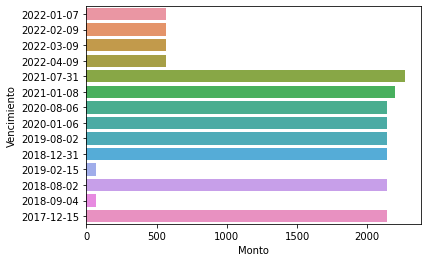

In [45]:
sns.barplot(x = dfs[0]['Monto'], y = dfs[0]['Vencimiento'])

## Cerrar sesión

In [ ]:
logout = driver.find_element(By.XPATH, '/html/body/div[2]/div/form/a')
logout.click()

## Cerrar navegador web

In [18]:
driver.quit()

# Webscrapping

In [ ]:
# Extraer el contenido html de la pagina actual en selenium
dfs = pd.read_html(driver.page_source)

## Tablas de carga academica

In [ ]:
# La tabla 0 es desechable
len(dfs)

In [ ]:
# Mostrar la primera tabla
dfs[7]

In [ ]:
# Cambiar nombre de columnas
columnas = ['Seccion', 'Tipo', 'Clave', 'Asignatura', 'Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Cupo', 'Opcion', 'U1', 'U2']

for i in range(1, len(dfs)):
    dfs[i] = dfs[i].set_axis(columnas, axis=1)
    dfs[i] = dfs[i].drop(['U1', 'U2'], axis = 1)

In [ ]:
# Mostrar la primera tabla con columnas limpias
dfs[1]

In [ ]:
for df in range(1, len(dfs)):
    print(df)
    for fila in dfs[df][['Asignatura', 'Cupo']].values:
        print('TIC' in fila[0], fila[0], fila[1])
        
    print('\n')

In [ ]:
# Obtener ancla en tabla parametros especificos de
# nombre de asignatura, profesor, horarios
xquery = '//table/tbody/tr[contains(., "Negocios digitales") and contains(., "Rodríguez Santiago / Juan Manuel") and contains(., "10:0012:00") and contains(., "10:0011:00")]/td/a'
el = driver.find_element(By.XPATH, xquery)
el.text

In [ ]:
carga = ['PID0201', '1', 'Prácticas Profesionales I']

def query(carga):
    xquery = '//table/tbody/tr['
    for i in range(len(carga)):
        xquery += 'contains(.,"' + carga[i] + '")'
        if i < (len(carga)-1):
            xquery += ' and '
    xquery += ']/td/a'

    return(xquery)

query(carga)

el = driver.find_element(By.XPATH, xquery)
el.text

In [ ]:
el = driver.find_element(By.XPATH, xquery)
el.text

In [ ]:
/html/body/center/table[8]/tbody/tr[9]/td[12]/a

In [ ]:
range(1, len(dfs))

In [ ]:
for j in range(1, len(dfs)):
    mydf = dfs[j]
    
    splits = []
    string = mydf['Asignatura']
    # Imprimir la lista de asignaturas de la tabla
    print(string)

In [ ]:
string

In [ ]:
# Buscar coincidencias en cada registro del dataframe
for s in string:
    print(s)
    print('Álvarez Estrada / José Enrique' in s, end = '\n\n')

In [ ]:
for i in range(len(string)):
        lista = string[i].split('  ')
        # Imprimir los componentes asignatura, nombre, tipo de clase
        print(lista)
        splits.append(lista)

In [ ]:
asignaturas = []
    profesores = []
    modalidades = []

    for i in splits:
        asignaturas.append(i[0])
        profesores.append(i[1])
        modalidades.append(i[2])

In [ ]:
for j in range(1, len(dfs)):
    mydf = dfs[j]
    
    splits = []
    string = mydf['Asignatura']
    # Imprimir la lista de asignaturas de la tabla
    print(string)

    for i in range(len(string)):
        lista = string[i].split('  ')
        # Imprimir los componentes asignatura, nombre, tipo de clase
        print(lista)
        splits.append(lista)

    asignaturas = []
    profesores = []
    modalidades = []

    for i in splits:
        asignaturas.append(i[0])
        profesores.append(i[1])
        modalidades.append(i[2])

    mydf['Asignatura'] = asignaturas
    mydf.insert(4, 'Profesor', profesores)
    mydf.insert(5, 'Modalidad', modalidades)

## Tablas de oferta academica

In [53]:
ofertaAcademica = driver.find_element(By.XPATH, '/html/body/div[1]/div/div/div/div/div/ul[2]/li[1]/a')
ofertaAcademica.click()

In [54]:
secciones = driver.find_element(By.XPATH, '/html/body/center/ul/li[1]/a')
secciones.click()

In [55]:
talleres = driver.find_element(By.XPATH, '/html/body/center/ul/li[2]/a')
talleres.click()

In [56]:
lenguaExtranjera = driver.find_element(By.XPATH, '/html/body/center/ul/li[3]/a')
lenguaExtranjera.click()

In [65]:
# Extraer el contenido html de la pagina actual en selenium
dfs = pd.read_html(driver.page_source)

In [66]:
# La tabla 0 es desechable
len(dfs)

2

In [67]:
# Mostrar la primera tabla
dfs[1]

Secciones                                                             \
      Clave Sección                                         Asignatura   
0    LI0109       6  Tópicos selectos de inglés  Gamborino Ubilla /...   
1    LI0109       7  Tópicos selectos de inglés  De la Peña Amante ...   

                                                                       \
                 L                M              M.1                J   
0  C-0311:00-13:00  C-0311:00-13:00  C-0311:00-13:00  C-0311:00-13:00   
1  C-0520:00-22:00  C-0520:00-22:00  C-0520:00-22:00  C-0520:00-22:00   

                                                              \
                 V  S Unnamed: 9_level_1 Unnamed: 10_level_1   
0  C-0311:00-13:00  -                NaN                 NaN   
1  C-0520:00-22:00  -                NaN                 NaN   

                                                               
  Unnamed: 11_level_1 Unnamed: 12_level_1 Unnamed: 13_level_1  
0                 NaN                 NaN                 NaN  
1                 NaN                 NaN                 NaN

In [60]:
# Cambiar nombre de columnas Secciones
columnas = ['Tipo', 'Clave', 'Seccion', 'Asignatura', 'Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'U1', 'U2', 'U3', 'U4']

for i in range(1, len(dfs)):
    dfs[i] = dfs[i].set_axis(columnas, axis=1)
    dfs[i] = dfs[i].drop(['Tipo', 'U1', 'U2', 'U3', 'U4'], axis = 1)

In [68]:
# Cambiar nombre de columnas Talleres/Lengua Extranjera
columnas = ['Clave', 'Seccion', 'Asignatura', 'Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'U1', 'U2', 'U3', 'U4', 'U5']

for i in range(1, len(dfs)):
    dfs[i] = dfs[i].set_axis(columnas, axis=1)
    dfs[i] = dfs[i].drop(['U1', 'U2', 'U3', 'U4', 'U5'], axis = 1)

In [69]:
# Mostrar la primera tabla con columnas limpias
dfs[1]

,Clave,Seccion,Asignatura,Lunes,Martes,Miercoles,Jueves,Viernes,Sabado
0,LI0109,6,Tópicos selectos de inglés Gamborino Ubilla /...,C-0311:00-13:00,C-0311:00-13:00,C-0311:00-13:00,C-0311:00-13:00,C-0311:00-13:00,-
1,LI0109,7,Tópicos selectos de inglés De la Peña Amante ...,C-0520:00-22:00,C-0520:00-22:00,C-0520:00-22:00,C-0520:00-22:00,C-0520:00-22:00,-


In [70]:
dfs[1].sort_values(by = 'Asignatura')

,Clave,Seccion,Asignatura,Lunes,Martes,Miercoles,Jueves,Viernes,Sabado
1,LI0109,7,Tópicos selectos de inglés De la Peña Amante ...,C-0520:00-22:00,C-0520:00-22:00,C-0520:00-22:00,C-0520:00-22:00,C-0520:00-22:00,-
0,LI0109,6,Tópicos selectos de inglés Gamborino Ubilla /...,C-0311:00-13:00,C-0311:00-13:00,C-0311:00-13:00,C-0311:00-13:00,C-0311:00-13:00,-


In [71]:
for j in range(1, len(dfs)):
    mydf = dfs[j]
    
    splits = []
    string = mydf['Asignatura']

    for i in range(len(string)):
        lista = string[i].split('  ')
        splits.append(lista)

    asignaturas = []
    profesores = []
    modalidades = []

    for i in splits:
        asignaturas.append(i[0])
        profesores.append(i[1])
        modalidades.append(i[2])

    mydf['Asignatura'] = asignaturas
    mydf.insert(4, 'Profesor', profesores)
    mydf.insert(5, 'Modalidad', modalidades)

In [72]:
dfs[1].sort_values(by = 'Asignatura')

,Clave,Seccion,Asignatura,Lunes,Profesor,Modalidad,Martes,Miercoles,Jueves,Viernes,Sabado
0,LI0109,6,Tópicos selectos de inglés,C-0311:00-13:00,Gamborino Ubilla / Pablo,Asignatura Presencial,C-0311:00-13:00,C-0311:00-13:00,C-0311:00-13:00,C-0311:00-13:00,-
1,LI0109,7,Tópicos selectos de inglés,C-0520:00-22:00,De la Peña Amante / Luis David,Asignatura Presencial,C-0520:00-22:00,C-0520:00-22:00,C-0520:00-22:00,C-0520:00-22:00,-


In [ ]:
dias = dfs[1][['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado']]
dias

In [ ]:
for i in dias.index:
    for j in dias.:
        print(i,j)

In [ ]:
for column in dias.columns:
    k = dias[column].values
    for i in k:
        if i != '-':
            finds = re.findall('[0-9]+', i)
            if len(finds) > 4:
                finds = finds[1:]
            finds = list(map(int, finds))
            # print(finds)              
            
            if finds[2] < finds[0]:
                n = [digit for digit in str(finds[0])]
                if len(n) > 2:
                    finds[0] = n[-2]+n[-1]
                else:
                    finds[0] = n[-1]
            for a in range(len(finds)):
                if finds[a] == 0:
                    finds[a] = str(finds[a])+'0'
                else:
                    finds[a] = str(finds[a])
            i = finds[0]+':'+finds[1]+'-'+finds[2]+':'+finds[3]
        print(k)
    

In [ ]:
for i, j in dias.iterrows():
    for k in j:
        if k != '-':
            finds = re.findall('[0-9]+', k)
            if len(finds) > 4:
                finds = finds[1:]
            finds = list(map(int, finds))
            # print(finds)              
            
            if finds[2] < finds[0]:
                n = [digit for digit in str(finds[0])]
                if len(n) > 2:
                    finds[0] = n[-2]+n[-1]
                else:
                    finds[0] = n[-1]
            for a in range(len(finds)):
                if finds[a] == 0:
                    finds[a] = str(finds[a])+'0'
                else:
                    finds[a] = str(finds[a])
            k = finds[0]+':'+finds[1]+'-'+finds[2]+':'+finds[3]
            print(k)

In [ ]:
dias

In [ ]:
for i, j in dias.iterrows():
    for k in j:
        print(k, end = '\t')
        m = re.search('-[0-9]{2}:[0-9]{2}?', k)
        if m != None:
            print('Match 1: ' + m.group(), end = '\t')
            m = re.search('[0-9]{2}:[0-9]{2}', k)
            if m != None:
                print('Match 2: ' + m.group(), end = '\n')
                split = m.split(':')
                print(int(split[0]))
                
            else:
                print('\tMatch 2: None')
        else:
            print('\tMatch 1: None')

In [ ]:
for i in dias.itertuples():
    print(i)

## Almacenar tablas de oferta academica

In [78]:
# Importar biblioteca para conexion a base de datos
from sqlalchemy import create_engine
# Establecer conexion a base de datos
engine = create_engine("mysql+mysqldb://root:@localhost/sigmaa")

In [79]:
dfs[1]

,Clave,Seccion,Asignatura,Lunes,Profesor,Modalidad,Martes,Miercoles,Jueves,Viernes,Sabado
0,LI0109,6,Tópicos selectos de inglés,C-0311:00-13:00,Gamborino Ubilla / Pablo,Asignatura Presencial,C-0311:00-13:00,C-0311:00-13:00,C-0311:00-13:00,C-0311:00-13:00,-
1,LI0109,7,Tópicos selectos de inglés,C-0520:00-22:00,De la Peña Amante / Luis David,Asignatura Presencial,C-0520:00-22:00,C-0520:00-22:00,C-0520:00-22:00,C-0520:00-22:00,-


In [80]:
# Almacenar la oferta academica en la base de datos
for df in range(1, len(dfs)):
    if df == 1:
        dfs[df].to_sql('oferta_academica', con = engine, if_exists='replace')
    else:
        dfs[df].to_sql('oferta_academica', con = engine, if_exists='append')

## Almacenar tablas de carga academica

# Ingresar al sistema de prácticas

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

import pandas as pd

In [ ]:
driver = webdriver.Edge()

In [ ]:
url = 'https://uclb.ucaribe.edu.mx/practicas/'
driver.get(url)

In [ ]:
usuario = driver.find_element(By.XPATH, '/html/body/table/tbody/tr/td/form/table/tbody/tr[1]/td[2]/table/tbody/tr[1]/td/table/tbody/tr[1]/td[2]/input')
usuario.send_keys('170300075')

In [ ]:
password = driver.find_element(By.XPATH, '/html/body/table/tbody/tr/td/form/table/tbody/tr[1]/td[2]/table/tbody/tr[1]/td/table/tbody/tr[2]/td[2]/input')
password.send_keys('Maripau01')

In [ ]:
send = driver.find_element(By.XPATH, '/html/body/table/tbody/tr/td/form/table/tbody/tr[1]/td[2]/table/tbody/tr[1]/td/input')
send.click()

In [ ]:
dropdown = driver.find_element(By.XPATH, '/html/body/div[3]/div/div/div[1]/ul/li[2]/a')
dropdown.click()

In [ ]:
ofertaProyectos = driver.find_element(By.XPATH, '/html/body/div[3]/div/div/div[1]/ul/li[2]/ul/li[2]/a')
ofertaProyectos.click()

In [ ]:
dfs = pd.read_html(driver.page_source)

In [ ]:
len(dfs)

In [ ]:
tabla = dfs[3]

In [ ]:
tabla

In [ ]:
tabla.columns.values

In [ ]:
tabla.info()

In [ ]:
logout = driver.find_element(By.XPATH, '/html/body/div[3]/div/div/div[1]/ul/li[3]/a')
logout.click()

In [ ]:
driver.quit()

# Tabla de asignaturas deseadas

In [ ]:
import pandas as pd

In [ ]:
profesores = ['Jiménez Sánchez / Ismael', 'Carmona Ramirez / Leslye']
asignaturas = ['Introducción a las redes', 'Física clásica']
lunes = ['', '11:00 - 13:00']
martes = ['', '']
miercoles = ['7:00 - 9:00', '']
jueves = ['', '10:00 - 12:00']
viernes = ['7:00 - 8:00', '']
sabado = ['', '']

In [ ]:
df = pd.DataFrame({
    'Asignaturas':asignaturas,
    'Profesores':profesores,
    'Lunes':lunes,
    'Martes':martes,
    'Miercoles':miercoles,
    'Jueves':jueves,
    'Viernes':viernes,
    'Sabado':sabado
})

df

#   Ingresar al servicio social

In [ ]:
# Bibliotecas para usar Selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains

# Bibliotecas para manipulación de datos
import pandas as pd

# Biblioteca de empresiones regulares
import re

In [ ]:
# modo interactivo permite abrir la ventana del navegador
# si está en True. Si no, entonces lo hará sin abrirlo
modoInteractivo = True

if modoInteractivo == True:
    driver = webdriver.Chrome()
    driver.maximize_window()
else:
    op = webdriver.EdgeOptions()
    op.add_argument('headless')
    driver = webdriver.Edge(options = op)

In [ ]:
url = 'https://uclb.ucaribe.edu.mx/sass/'
driver.get(url)

## Ingresar al sistema

In [ ]:
# Credenciales del usuario
username = '170300075'
password = 'Maripau01'

In [ ]:
# Escribir el nombre de usuario
user = driver.find_element(By.XPATH, '/html/body/table/tbody/tr[2]/td/form/table/tbody/tr[1]/td/table/tbody/tr[1]/td/table/tbody/tr[1]/td[2]/input')
user.send_keys(username)

In [ ]:
# Escribir la contreña del usuario
passw = driver.find_element(By.XPATH, '/html/body/table/tbody/tr[2]/td/form/table/tbody/tr[1]/td/table/tbody/tr[1]/td/table/tbody/tr[2]/td[2]/input')
passw.send_keys(password)

In [ ]:
# Dar clic a login para acceder al sistema
submit = driver.find_element(By.XPATH, '/html/body/table/tbody/tr[2]/td/form/table/tbody/tr[1]/td/table/tbody/tr[1]/td/div/input')
submit.click()

## Capturar reportes parciales

In [ ]:
# Acceder a la vista de captura del reporte
capturar_reporte = driver.find_element(By.XPATH, '/html/body/div[3]/div/div/div[2]/div/div/div/div/div/table/tbody/tr/td/table/tbody/tr/td[1]/span[3]/a')
capturar_reporte.click()

In [ ]:
# Añadir la descripcion del reporte
descripcion_actividad = driver.find_element(By.XPATH, '/html/body/div[3]/div/div/div[2]/div/div/div/div/div/table/tbody/tr/td/table/tbody/tr/td[1]/form/table[3]/tbody/tr[13]/td/textarea')
descripcion_actividad.send_keys('Esto es un ejemplo')

In [ ]:
driver.quit()